# PyMC3 Demo
---

In [1]:
import numpy.random as rng
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')

In [2]:
%matplotlib inline

## Generate Toy-Data

In [3]:
rng.seed(123)

In [4]:
N = 100

In [5]:
p0, p1 = rng.uniform(0, 1, size=2)

In [6]:
data = rng.binomial(n=1, p=[p0, p1], size=[N, 2])

## Build Model

In [7]:
with pm.Model() as model:
    alpha = pm.Uniform("alpha", 0, 10, shape=2)
    beta = pm.Uniform("beta", 0, 10, shape=2)
    p = pm.Beta("p", alpha, beta, shape=2)
    
    obs = pm.Bernoulli("obs", p, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:02<00:00, 4579.34draws/s]
The number of effective samples is smaller than 10% for some parameters.


## View Results

In [8]:
pm.summary(trace)

/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,6.541492,2.401052,0.090237,2.040705,9.997878,650.775885,1.003424
alpha__1,3.861560,2.132335,0.085377,0.260611,8.161837,616.213239,1.000812
beta__0,3.649777,2.068926,0.074531,0.194664,7.685113,764.215170,1.001950
beta__1,6.623767,2.370097,0.094694,2.191683,9.998866,588.620198,1.004842
p__0,0.731525,0.043277,0.001495,0.643045,0.809649,765.690963,1.000403
p__1,0.279863,0.042831,0.001431,0.200459,0.366200,799.243390,1.000315


## Plot Results

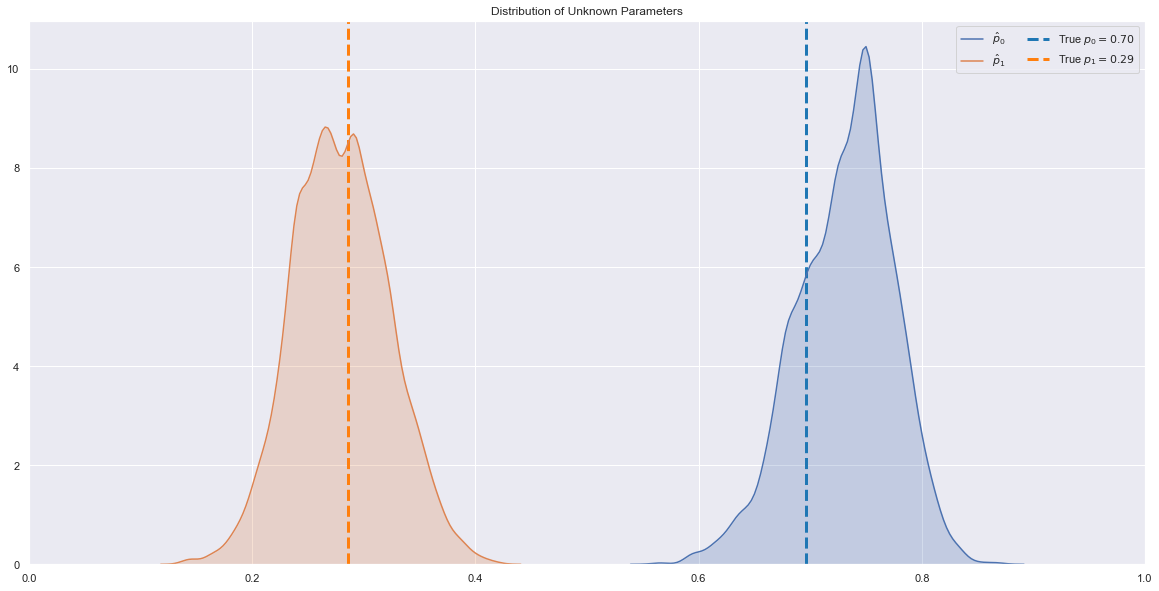

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Distribution of Unknown Parameters')
sns.kdeplot(trace['p'][..., 0], shade=True, ax=ax, label=r"$\hat{p}_0$")
sns.kdeplot(trace['p'][..., 1], shade=True, ax=ax, label=r"$\hat{p}_1$")
y_min, y_max = ax.get_ylim()
ax.vlines(p0, 0, y_max, lw=3, linestyle='--', color="tab:blue", label=f"True $p_0={p0:.2f}$")
ax.vlines(p1, 0, y_max, lw=3, linestyle='--', color="tab:orange", label=f"True $p_1={p1:.2f}$")
plt.xlim(0, 1)
plt.ylim(0, y_max)
plt.legend(ncol=2);